In [2]:
%matplotlib inline

import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

### Load MNIST

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

#### 인풋 데이터 및 레이블 정의

In [ ]:
inps = tf.placeholder(tf.float32, [None, 784])
labels = tf.placeholder(tf.float32, [None, 10])

### Problem 2
 - Hidden layer를 추가해보세요.
 - hidden layer dimension = 10
 - Network
     - $h_1 = W_1^Tx+b_1$
     - $h_2= W_2^Th_1+b_2$
     - $\hat{y} = \text{softmax}(h_2)$

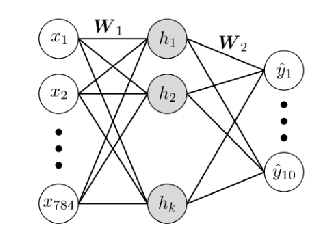

In [3]:
img = Image.open("../resource/multilayer_softmax_regression.png")
plt.imshow(img)
plt.axis("off"); plt.show()

In [ ]:
# TODO: 첫번째 레이어 구현 (784dim -> 10dim)
# 아래 변수들을 정의하세요.
weight_1 = 
bias_1 = 
hidden_1 = 

In [ ]:
# TODO: 첫번째 레이어 구현 (10dim -> 10dim)
weight_2 = 
bias_2 = 
hidden_2 = 

### Problem 3
  - linear layer 함수 구현

In [ ]:
# TODO: p-dim -> q-dim linear layer 함수 구현
def LinearLayer(inp, inp_dim, out_dim):
    """ Linear layer: inp * weight + bias
    Args:
        inp: input data, [batch_size, inp_dim]
        inp_dim: input dimension
        out_dim: output dimension
    Returns:
        out: Output tensor with the computed logits, [batch_size, out_dim]
             return (inp * weight + bias)
    """
    
    # 아래 변수들을 정의하세요.
    weight = 
    bias = 
    out = 
    return out

In [ ]:
# TODO: LinearLayer 함수를 이용해서 아래 변수를 정의하세요.
hidden_1 = 
hideen_2 = 

#### Training model
  - 약 11%로 성능이 떨어짐

In [ ]:
# loss 및 optimizer 정의
pred = tf.nn.softmax(hidden_2)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(labels * tf.log(pred), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
# 정확도 정의
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(10):
        total_cost = 0

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train_step, cross_entropy], \
                                   feed_dict={inps: batch_xs, labels: batch_ys})
            total_cost += cost_val

        print( "Epoch:", "%04d" % (epoch + 1), \
            "Avg. cost =", '{:.3f}'.format(total_cost / total_batch))

    # 테스트 데이터에 대한 정확도
    print("Test Accuracy: ", sess.run(accuracy, \
                    feed_dict={inps: mnist.test.images, labels: mnist.test.labels}))